[[ 0.50316464  0.11135559]
 [ 1.06597837 -0.63035547]
 [ 0.95663377  0.58199637]
 [ 0.33961202  0.40713937]
 [ 2.17952333 -0.08488181]
 [ 2.00520942  0.7817976 ]
 [ 0.12531776 -0.14925731]
 [ 1.06990641  0.36447753]
 [-0.76391099 -0.6136396 ]
 [ 0.55678871  0.8810501 ]]
[1 1 0 0 1 1 1 0 0 0]


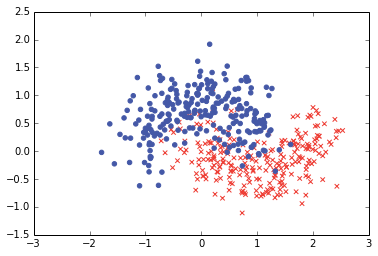

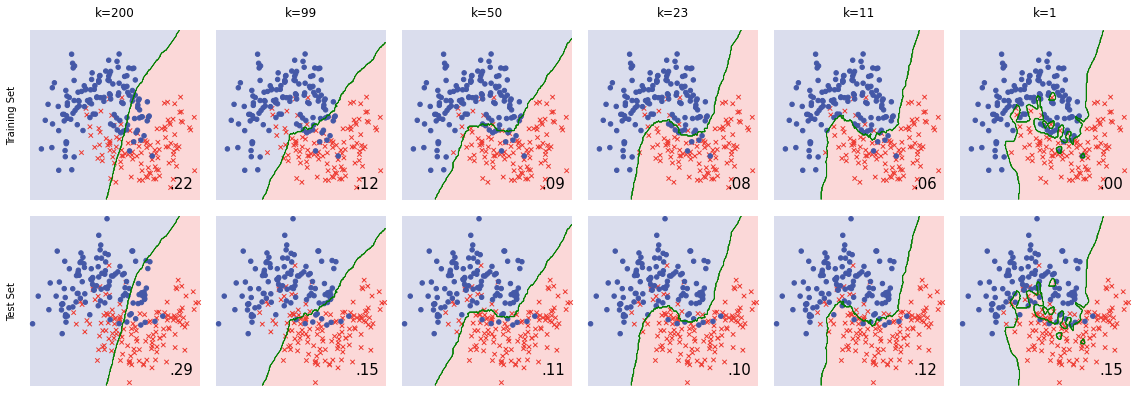

In [6]:
# Creating the dataset
# e.g. make_moons generates crescent-shaped data
# Check out make_classification, which generates linearly-separable data
%matplotlib inline

from sklearn.datasets import make_moons

X, y = make_moons(
    n_samples=500,  # the number of observations
    random_state=1,
    noise=0.3
)

# Take a peek
print(X[:10,])
print(y[:10])

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

 
# Plot the first feature against the other, color by class
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="#EE3D34", marker="x")
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="#4458A7", marker="o")
plt.show()



def detect_plot_dimension(X, h=0.02, b=0.05):
	x_min, x_max = X[:, 0].min() - b, X[:, 0].max() + b
	y_min, y_max = X[:, 1].min() - b, X[:, 1].max() + b
	xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
	dimension = xx, yy
	return dimension



def detect_decision_boundary(dimension, model):
	xx, yy = dimension  # unpack the dimensions
	boundary = model.predict(np.c_[xx.ravel(), yy.ravel()])
	boundary = boundary.reshape(xx.shape)  # Put the result into a color plot
	return boundary



def plot_decision_boundary(panel, dimension, boundary, colors=['#DADDED', '#FBD8D8']):
	xx, yy = dimension  # unpack the dimensions
	panel.contourf(xx, yy, boundary, cmap=ListedColormap(colors), alpha=1)
	panel.contour(xx, yy, boundary, colors="g", alpha=1, linewidths=0.5)  # the decision boundary in green



def plot_dataset(panel, X, y, colors=["#EE3D34", "#4458A7"], markers=["x", "o"]):
	panel.scatter(X[y == 1, 0], X[y == 1, 1], color=colors[0], marker=markers[0])
	panel.scatter(X[y == 0, 0], X[y == 0, 1], color=colors[1], marker=markers[1])


def calculate_prediction_error(model, X, y):
	yPred = model.predict(X)
	score = 1 - round(metrics.accuracy_score(y, yPred), 2)
	return score


def plot_prediction_error(panel, dimension, score, b=.3):
	xx, yy = dimension  # unpack the dimensions
	panel.text(xx.max() - b, yy.min() + b, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')


def explore_fitting_boundaries(model, n_neighbors, datasets, width):
	# determine the height of the plot given the aspect ration of each panel should be equal
	height = float(width)/len(n_neighbors) * len(datasets.keys())
	nrows = len(datasets.keys())
	ncols = len(n_neighbors)
	# set up the plot
	figure, axes = plt.subplots(
		nrows,
		ncols,
		figsize=(width, height),
		sharex=True,
		sharey=True
	)
	dimension = detect_plot_dimension(X, h=0.02)  # the dimension each subplot based on the data
	# Plotting the dataset and decision boundaries
	i = 0
	for n in n_neighbors:
		model.n_neighbors = n
		model.fit(datasets["Training Set"][0], datasets["Training Set"][1])
		boundary = detect_decision_boundary(dimension, model)
		j = 0
		for d in datasets.keys():
			try:
				panel = axes[j, i]
			except (TypeError, IndexError):
				if (nrows * ncols) == 1:
					panel = axes
				elif nrows == 1:  # if you only have one dataset
					panel = axes[i]
				elif ncols == 1:  # if you only try one number of neighbors
					panel = axes[j]
			plot_decision_boundary(panel, dimension, boundary)  # plot the decision boundary
			plot_dataset(panel, X=datasets[d][0], y=datasets[d][1])  # plot the observations
			score = calculate_prediction_error(model, X=datasets[d][0], y=datasets[d][1])
			plot_prediction_error(panel, dimension, score, b=0.2)  # plot the score
			# make compacted layout
			panel.set_frame_on(False)
			panel.set_xticks([])
			panel.set_yticks([])
			# format the axis labels
			if i == 0:
				panel.set_ylabel(d)
			if j == 0:
				panel.set_title('k={}'.format(n))
			j += 1
		i += 1
	plt.subplots_adjust(hspace=0, wspace=0)  # make compacted layouta

# specify the model and settings
model = KNeighborsClassifier()
n_neighbors = [200, 99, 50, 23, 11, 1]
datasets = {
    "Training Set": [XTrain, yTrain],
    "Test Set": [XTest, yTest]
}
width = 20

# explore_fitting_boundaries(model, n_neighbors, datasets, width)
explore_fitting_boundaries(model=model, n_neighbors=n_neighbors, datasets=datasets, width=width)

plt.show()

Overall Error of k=99 Model: 0.15
Overall Error of k=1 Model: 0.15
Overall Error of k=99 Model: 0.15
Overall Error of k=1 Model: 0.15
Overall Error of k=50 Model: 0.11
The best values of k are:
1 according to the Training Set
23 according to the Test Set and
11 according to Cross-Validation


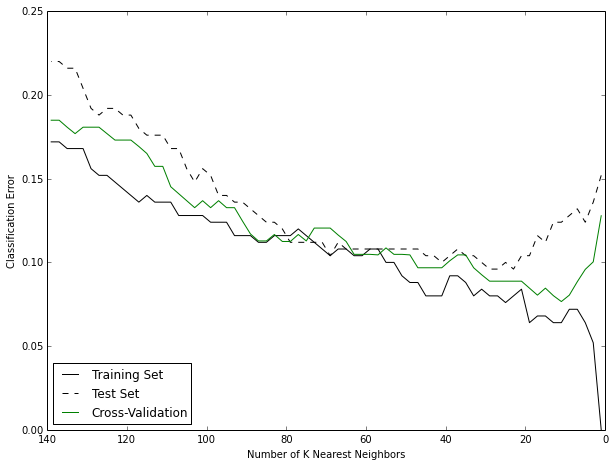

In [7]:
from sklearn.cross_validation import train_test_split

# Split into training and test sets
XTrain, XTest, yTrain, yTest = train_test_split(X, y, random_state=1, test_size=0.5)


from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn99 = KNeighborsClassifier(n_neighbors = 99)
knn99.fit(XTrain, yTrain)
yPredK99 = knn99.predict(XTest)
print "Overall Error of k=99 Model:", 1 - round(metrics.accuracy_score(yTest, yPredK99), 2)

knn1 = KNeighborsClassifier(n_neighbors = 1)
knn1.fit(XTrain, yTrain)
yPredK1 = knn1.predict(XTest)
print "Overall Error of k=1 Model:", 1 - round(metrics.accuracy_score(yTest, yPredK1), 2)

#If the value for k is high (e.g. k=99), then the model considers a large number of neighbors when making a a decision about the class of an unknown datapoint. This means that the model is quite constrained, since it has to take a large amount of information into account when classifying instances. In other words, a high number for k give rise to relatively “rigid” model behaviour.

#By contrast, if the value for k is low (e.g. k=1 or k=2), then only a few neighbors are taken into account when making a classification decision. It is a very flexible model with a lot of complexity – it really fits very closely to the precise shape of the dataset. Hence, the predictions of the model are much more dependent on the local tendencies of the data (crucially, this includes the noise!).


knn99 = KNeighborsClassifier(n_neighbors = 99)
knn99.fit(XTrain, yTrain)
yPredK99 = knn99.predict(XTest)
print "Overall Error of k=99 Model:", 1 - round(metrics.accuracy_score(yTest, yPredK99), 2)

knn1 = KNeighborsClassifier(n_neighbors = 1)
knn1.fit(XTrain, yTrain)
yPredK1 = knn1.predict(XTest)
print "Overall Error of k=1 Model:", 1 - round(metrics.accuracy_score(yTest, yPredK1), 2)

knn50 = KNeighborsClassifier(n_neighbors = 50)
knn50.fit(XTrain, yTrain)
yPredK50 = knn50.predict(XTest)
print "Overall Error of k=50 Model:", 1 - round(metrics.accuracy_score(yTest, yPredK50), 2)

import numpy as np
from sklearn.cross_validation import train_test_split, cross_val_score

knn = KNeighborsClassifier()

# the range of number of neighbors you want to test
n_neighbors = np.arange(1, 141, 2)

# here you store the models for each dataset used
train_scores = list()
test_scores = list()
cv_scores = list()

# loop through possible n_neighbors and try them out
for n in n_neighbors:
	knn.n_neighbors = n
	knn.fit(XTrain, yTrain)
	train_scores.append(1 - metrics.accuracy_score(yTrain, knn.predict(XTrain))) 
	test_scores.append(1 - metrics.accuracy_score(yTest, knn.predict(XTest)))
	cv_scores.append(1 - cross_val_score(knn, XTrain, yTrain, cv = 10).mean())  

# what do these different datasets think is the best value of k?
print(
    'The best values of k are:\n' \
    '{} according to the Training Set\n' \
    '{} according to the Test Set and\n' \
    '{} according to Cross-Validation'.format(
        min(n_neighbors[train_scores == min(train_scores)]),
        min(n_neighbors[test_scores == min(test_scores)]),
        min(n_neighbors[cv_scores == min(cv_scores)])
    )
)

# let's plot the error you get with different values of k
plt.figure(figsize=(10,7.5))
plt.plot(n_neighbors, train_scores, c="black", label="Training Set")
plt.plot(n_neighbors, test_scores, c="black", linestyle="--", label="Test Set")
plt.plot(n_neighbors, cv_scores, c="green", label="Cross-Validation")
plt.xlabel('Number of K Nearest Neighbors')
plt.ylabel('Classification Error')
plt.gca().invert_xaxis()
plt.legend(loc = "lower left")
plt.show()